# Dissimilarity based on connectivity analysis

Connectivity aims at identifying preferential flow path and can be measured as the probability of two voxels being connected. In a voxet, property field values can be classified in distinct categories. Two voxels  are said connected if there exists a path defined by adjacent voxels of the same class bewteen them. 

Due to the definition of connectivity, related metrics or indicators can be computed from binary voxets. For discrete property fields, it implies as many indicators as categories. For continuous property fields, it requires a form of discretization. In addition, connectivity can be estimated as a global measure or as a function of a distance between voxels, similarly to what can be done to compute empirical semi-variograms. In the following notebook, we illustrate global or lag-dependent uncertainty indicators for 2D and 3D, discrete and continuous property fields.

One can note that the number of voxel pairs to be considered is in the order of $n^2$, where $n$ is the voxet size. To keep computing time reasonable, we randomly sub-sample among the pairs of voxels.

See the papers of [Renard and Allard (2013)](https://www.sciencedirect.com/science/article/pii/S0309170811002223?casa_token=woQblJzETg8AAAAA:EP2T6n5KGFh1CSnhFYwUGDSNcJ_qK_MyM7df0f5aNcqS_hPllijJTHBY8J2vFVRqlQELvqJRTQ) or [Meerschman et al. (2013)](https://www.sciencedirect.com/science/article/pii/S0098300412003299?casa_token=eM_liiR_q98AAAAA:t4ybsl4q_vOFWAsSVfn3aShtHohXJb9mGJaDf1frwlb3fp06EdlqGPUBoTX4zsEosxVvejebAQ) for more details.

### References
Meerschman, E., Pirot, G., Mariethoz, G., Straubhaar, J., Van Meirvenne, M., & Renard, P. (2013). A practical guide to performing multiple-point statistical simulations with the Direct Sampling algorithm. Computers & Geosciences, 52, 307-324. https://doi.org/10.1016/j.cageo.2012.09.019

Renard, P., & Allard, D. (2013). Connectivity metrics for subsurface flow and transport. Advances in Water Resources, 51, 168-196. https://doi.org/10.1016/j.advwatres.2011.12.001


In [2]:
# import modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import manifold
import pickle
from uncertaintyIndicators import dist_lpnorm_percentile_global_connectivity, dist_lpnorm_categorical_lag_connectivity, dist_lpnorm_percentile_lag_connectivity 

picklefilenameconnectivity = "./pickledata/testing-model-subset-connectivity.pickle"
picklefilenamedata = "./pickledata/testing-model-subset.pickle"
sample_num1 = 9
sample_num2 = 2
myseed = 65432
nblags = 12 # number of lags
pnorm = 2
maxnbsamples2D = 7E2 # Maximum number of samples per category for 2D voxets
maxnbsamples3D = 1.5E3 # Maximum number of samples per category for 3D voxets

# import data
with open(picklefilenamedata, 'rb') as f:
    [grv_all,mag_all,mod_all,rho_all,sus_all,cmap,samples_ix] = pickle.load(f)

# get dimensions
[nz,ny,nx,nbsamples]=mod_all.shape
nsamples = len(samples_ix) #!nbsamples=nb sub-samples while nsamples=nb noddy models!

# load classes
array = np.reshape(mod_all,(nz*ny*nx,nbsamples))
classes = np.unique(array)
vmin = np.amin(array)
vmax = np.amax(array)

# for 3D images
yyy,zzz,xxx=np.meshgrid(np.arange(1,ny+1),np.flip(np.arange(1,nz+1)),np.arange(1,nx+1))
# for 2D images
xx=np.reshape(xxx[0,:,:],(ny,nx))
yy=np.reshape(yyy[0,:,:],(ny,nx))
zz=np.reshape(zzz[0,:,:],(ny,nx))

maxh2D = np.sqrt(nx**2+ny**2)/2 # maximum lag distance for 2D cases
maxh3D = np.sqrt(nx**2+ny**2+nz**2)/2 # maximum lag distance for 3D cases

## Indicator connectivity
For each class, we compute the connectivity as the probability that 2 points of the same class are connected, as a function of lag distance.

The maximum lag distance is indicated as an input parameter 'maxh2D' or 'maxh3D'. The number of lags $N$ is given by the parameter 'nblags'. The lag width $\delta$ is obtained by dividing the maximum lag distance by the number of lags. 

For a binary (0 or 1) voxet with $(v_j,v_k)$ denoting the pairs of voxets of class 1, the connectivity $\Gamma$ is defined as a function of the lag distance as:
$$
\Gamma(h_i) = {{\sum\limits_{(j,k)} \mathbb{1}^{connected}(v_j,v_k) }\over{\sum\limits_{(j,k)} 1}} \text{, where }1\leq i \leq N \text{, }h_i = \delta \times (i-0.5) \text{ and the distance between voxets } v_j \text{ and } v_k \text{ is bounded by } h_i \pm 0.5\delta \text{.}
$$


Given two indicator connectivity functions $\Gamma_1$ and $\Gamma_2$, we propose to use the following distance:

$ ||\Gamma_1 - \Gamma_2 ||_p = \left( \sum \limits_{1\leq i \leq n} |\Gamma_1(h_i) - \Gamma_2(h_i)|^p \right)^{{{1}\over{p}}}$, where $p=2$ in the following illustrations.



### 3D case

14-Jul-2021 (16:15:23) - COMPUTING INDICATOR CONNECTIVITY LITHOCODE START
indicator 0
img1 compute indicator_lag_connectivity


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:782: RuntimeWarning: overflow encountered in long_scalars
  elif img1cnt*img2cnt==0:


computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.0662363776628651


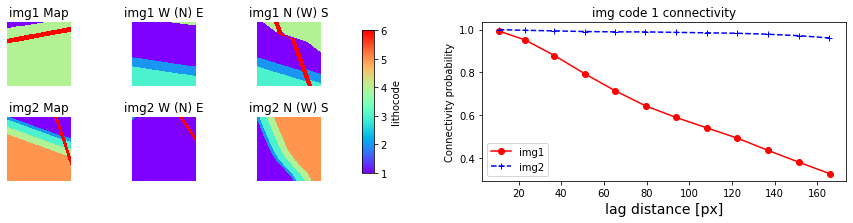

indicator 1
img1 compute indicator_lag_connectivity


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:782: RuntimeWarning: overflow encountered in long_scalars
  elif img1cnt*img2cnt==0:


computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.06517093156172707


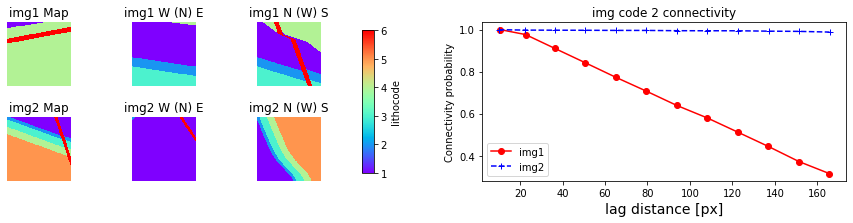

indicator 2
img1 compute indicator_lag_connectivity


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:782: RuntimeWarning: overflow encountered in long_scalars
  elif img1cnt*img2cnt==0:


computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.02072815173249913


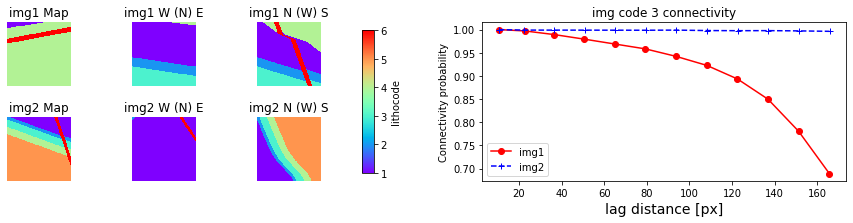

indicator 3
img1 compute indicator_lag_connectivity


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:782: RuntimeWarning: overflow encountered in long_scalars
  elif img1cnt*img2cnt==0:


computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.01658278495276409


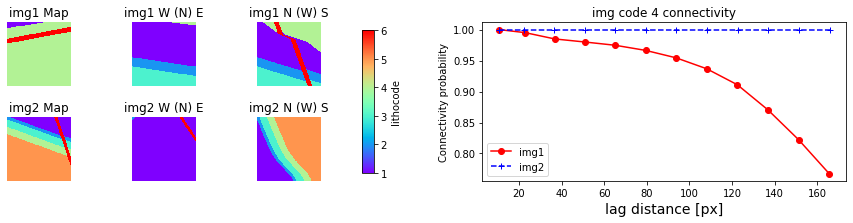

indicator 4
distance contribution: 0.16666666666666666


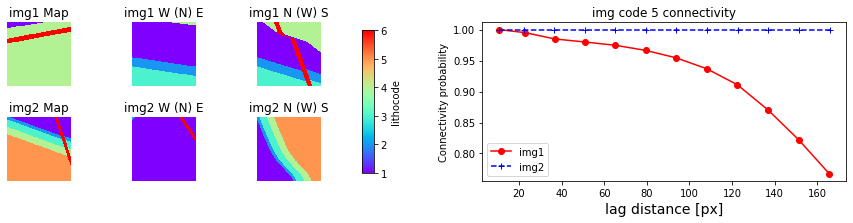

indicator 5
img1 compute indicator_lag_connectivity


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:782: RuntimeWarning: overflow encountered in long_scalars
  elif img1cnt*img2cnt==0:


computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.0


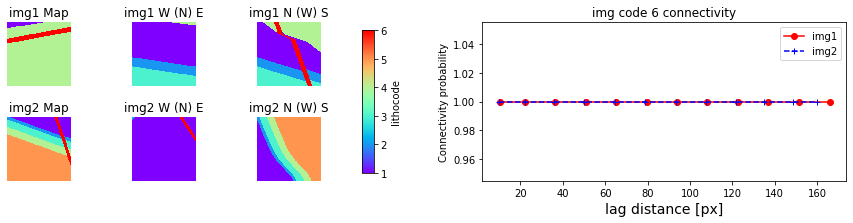

14-Jul-2021 (16:16:52) - COMPUTING INDICATOR CONNECTIVITY LITHOCODE END


In [3]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING INDICATOR CONNECTIVITY LITHOCODE START")
img1=mod_all[:,:,:,sample_num1].astype(int)
img2=mod_all[:,:,:,sample_num2].astype(int)
clblab='lithocode'
dist_lpnorm_categorical_lag_connectivity(img1,img2,xxx,yyy,zzz,nblags,maxh3D,maxnbsamples3D,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING INDICATOR CONNECTIVITY LITHOCODE END")

### 2D case
Same definition

14-Jul-2021 (16:16:52) - COMPUTING INDICATOR CONNECTIVITY LITHOCODE START
indicator 0
img1 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.09828007320363608


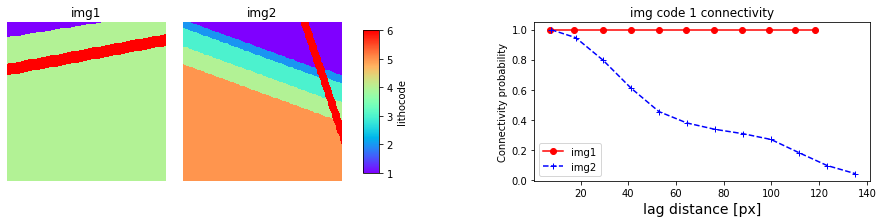

indicator 1
distance contribution: 0.16666666666666666


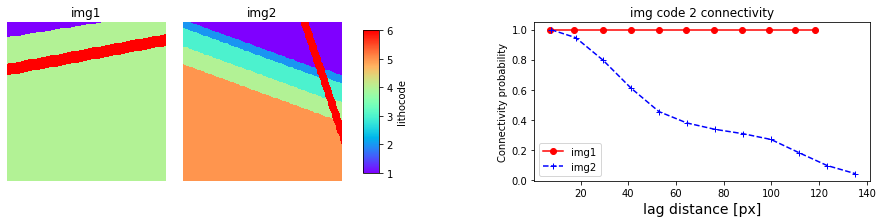

indicator 2
distance contribution: 0.16666666666666666


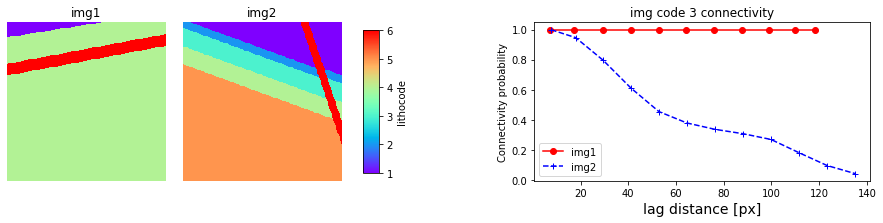

indicator 3
img1 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.023957964685555475


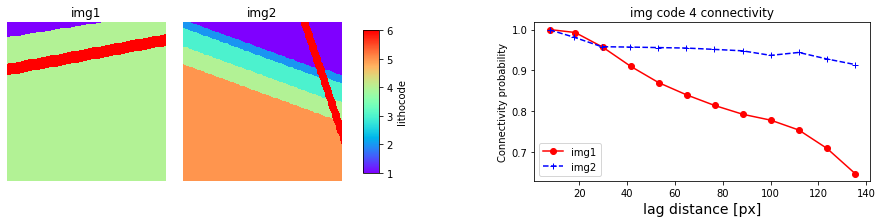

indicator 4
distance contribution: 0.16666666666666666


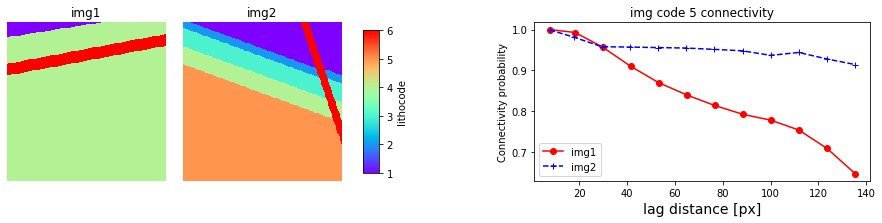

indicator 5
img1 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.0


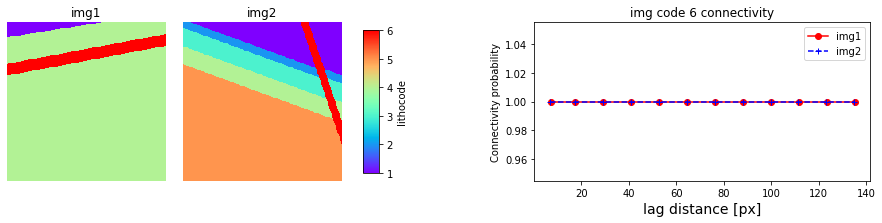

14-Jul-2021 (16:17:06) - COMPUTING INDICATOR CONNECTIVITY LITHOCODE END


In [4]:

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING INDICATOR CONNECTIVITY LITHOCODE START")
img1=np.reshape(mod_all[0,:,:,sample_num1].astype(int),(ny,nx))
img2=np.reshape(mod_all[0,:,:,sample_num2].astype(int),(ny,nx))
clblab='lithocode'
dist_lpnorm_categorical_lag_connectivity(img1,img2,xx,yy,zz,nblags,maxh2D,maxnbsamples2D,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING INDICATOR CONNECTIVITY LITHOCODE END")

## Continuous detailed Connectivity

Continuous property fields can be discretized into regular bins or along regular percentiles of their empirical distribution. In the first case, one could then apply indicator connectivity as defined above to each category. Here we chose the second approach. Each retained percentile defines a threshold that delineates the property field in two subsets of points, of higher (h) and lower (l) values respectively. For each subset of points, the indicator connectivity can be estimated as a function  of lag distance, as defined above. Then, for a given continuous property field, the connectivity can be represented by two maps $\Gamma^{l,k}(h_i)$ and $\Gamma^{h,k}(h_i)$ for the subsets of lower and higher values respectively, where $k$ and $i$ denotes the percentile and lag indices respectively. 

In that case, a distance between the connectivity $\Gamma_1$ and $\Gamma_2$ of two voxets can be defined as:

$ ||\Gamma_1 - \Gamma_2 ||_p = \left( {{1}\over{2 \sum \limits_{i,k} 1}} \sum \limits_{i,k} |\Gamma_1^{l,k}(h_i) - \Gamma_2^{l,k}(h_i)|^p + {{1}\over{2 \sum \limits_{i,k} 1}} \sum \limits_{i,k} |\Gamma_1^{h,k}(h_i) - \Gamma_2^{h,k}(h_i)|^p \right)^{{{1}\over{p}}}$, where $p$ is the degree of the norm.

### 2D case

14-Jul-2021 (16:17:06) - COMPUTING percentile lag continuous CONNECTIVITY MAG START
5.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - upper img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.012250516771284334
10.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
10.0th percentile connectivity - lower img2
computing 

computing connexion probability per lag
60.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
60.0th percentile connectivity - upper img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.008736840249934914
65.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
65.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
65.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
65.0th percentile connectivity - upper img2
computing distance and connexion for each sampled 

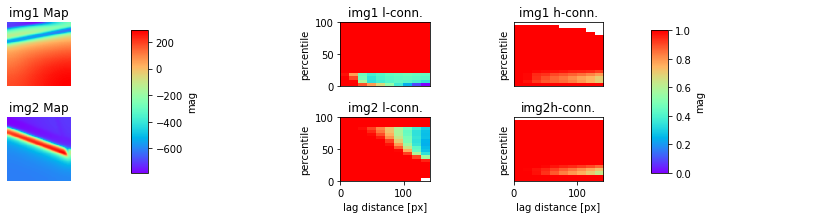

14-Jul-2021 (16:19:29) - COMPUTING percentile lag continuous CONNECTIVITY MAG END


In [5]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING percentile lag continuous CONNECTIVITY MAG START")
img1=mag_all[:,:,sample_num1].astype(int)
img2=mag_all[:,:,sample_num2].astype(int)
clblab='mag'
npctiles=20
nblags=10
dist_lpnorm_percentile_lag_connectivity(img1,img2,xx,yy,zz,npctiles,nblags,maxh2D,maxnbsamples2D,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING percentile lag continuous CONNECTIVITY MAG END")


### 3D case

14-Jul-2021 (16:19:29) - COMPUTING percentile lag continuous CONNECTIVITY MAG START
5.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - upper img2
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.025


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:876: RuntimeWarning: overflow encountered in long_scalars
  elif img1cntl*img2cntl==0:


10.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
10.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
10.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
10.0th percentile connectivity - upper img2
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.025
15.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
15.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
15.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per la

computing distance and connexion for each sampled pair of point
computing connexion probability per lag
90.0th percentile connectivity - upper img1
90.0th percentile connectivity - upper img2
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.0
95.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
95.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
95.0th percentile connectivity - upper img1
95.0th percentile connectivity - upper img2
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.0
100.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
100.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probabilit

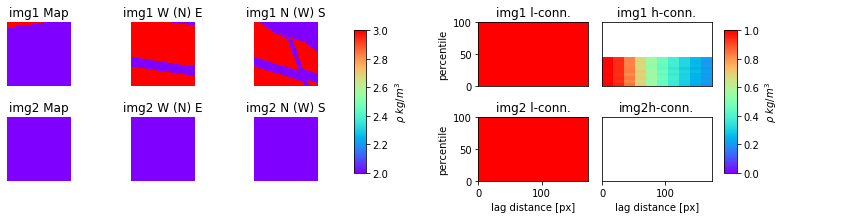

14-Jul-2021 (16:26:54) - COMPUTING percentile lag continuous CONNECTIVITY MAG END


In [6]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING percentile lag continuous CONNECTIVITY MAG START")
img1=rho_all[:,:,:,sample_num1].astype(int)
img2=rho_all[:,:,:,sample_num2].astype(int)
clblab="$\\rho$ $kg/m^3$"
npctiles=20
nblags=10
dist_lpnorm_percentile_lag_connectivity(img1,img2,xxx,yyy,zzz,npctiles,nblags,maxh3D,maxnbsamples3D,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING percentile lag continuous CONNECTIVITY MAG END")


## Continuous Global Connectivity

Another possibility for continuous property fields is to compute their global connectivity as a function of percentile threshold along their experimental cumulative denisy function. It can be seen as the integration of the detailed connectivity introduced above integrated along the lag distance and it produces one connectivity function for lower values and another one for higher values, with respect to the percentile threshold.

For a binary voxet, the global connectivity can be computed as:

$\Gamma(k,l) = \sum \limits_i p_i^2$, where $i$ denotes the labelled objects and $p_i$ is their proportion in their category ($\sum \limits_i p_i = 1$), $k$ denoting the percentile threshold index and $l$ the lower or higher set of values.

Then, given two global connectivity functions $\Gamma_1$ and $\Gamma_2$, we propose to use the following distance:

$ ||\Gamma_1 - \Gamma_2 ||_p = \left( {{1}\over{ \sum \limits_{k,l} 1}} \sum \limits_{k,l} |\Gamma_1(k,l) - \Gamma_2(k,l)|^p \right)^{{{1}\over{p}}}$, where $p=2$ in the following illustrations.


14-Jul-2021 (16:26:54) - COMPUTING Global CONTINUOUS CONNECTIVITY MAG START
global connectivity img1
Computing global percentile connectivity
5.0th percentile - global connectivity
10.0th percentile - global connectivity
15.0th percentile - global connectivity
20.0th percentile - global connectivity
25.0th percentile - global connectivity
30.0th percentile - global connectivity
35.0th percentile - global connectivity
40.0th percentile - global connectivity
45.0th percentile - global connectivity
50.0th percentile - global connectivity
55.0th percentile - global connectivity
60.0th percentile - global connectivity
65.0th percentile - global connectivity
70.0th percentile - global connectivity
75.0th percentile - global connectivity
80.0th percentile - global connectivity
85.0th percentile - global connectivity
90.0th percentile - global connectivity
95.0th percentile - global connectivity
100.0th percentile - global connectivity
global connectivity img2
Computing global percentile conne

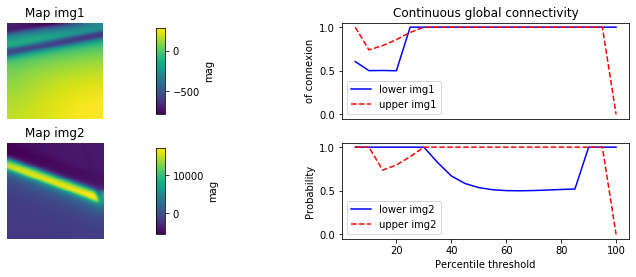

14-Jul-2021 (16:26:54) - COMPUTING Global CONTINUOUS CONNECTIVITY MAG END
14-Jul-2021 (16:26:54) - COMPUTING Global CONTINUOUS CONNECTIVITY RHO START
global connectivity img1
Computing global percentile connectivity
5.0th percentile - global connectivity
10.0th percentile - global connectivity
15.0th percentile - global connectivity
20.0th percentile - global connectivity
25.0th percentile - global connectivity
30.0th percentile - global connectivity
35.0th percentile - global connectivity
40.0th percentile - global connectivity
45.0th percentile - global connectivity
50.0th percentile - global connectivity
55.0th percentile - global connectivity
60.0th percentile - global connectivity
65.0th percentile - global connectivity
70.0th percentile - global connectivity
75.0th percentile - global connectivity
80.0th percentile - global connectivity
85.0th percentile - global connectivity
90.0th percentile - global connectivity
95.0th percentile - global connectivity
100.0th percentile - glob

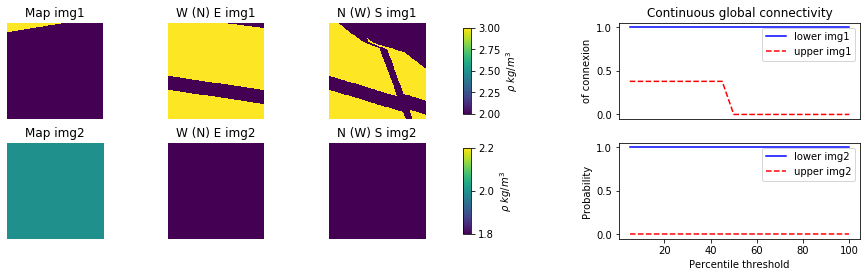

14-Jul-2021 (16:27:25) - COMPUTING Global CONTINUOUS CONNECTIVITY RHO END


In [7]:
# 2D case
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING Global CONTINUOUS CONNECTIVITY MAG START")
img1=mag_all[:,:,sample_num1].astype(int)
img2=mag_all[:,:,sample_num2].astype(int)
npctiles=20
clblab='mag'
dist_lpnorm_percentile_global_connectivity(img1,img2,npctiles,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING Global CONTINUOUS CONNECTIVITY MAG END")

# 3D case
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING Global CONTINUOUS CONNECTIVITY RHO START")
img1=rho_all[:,:,:,sample_num1].astype(int)
img2=rho_all[:,:,:,sample_num2].astype(int)
npctiles=20
clblab="$\\rho$ $kg/m^3$"
dist_lpnorm_percentile_global_connectivity(img1,img2,npctiles,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING Global CONTINUOUS CONNECTIVITY RHO END")

## Compute for all pair of realizations<span style='color:red'>\*</span>
<span style='color:red'>**\*WARNING: IT COULD TAKE AROUND 30 MINUTES. PRECOMPUTED RESULTS ALREADY AVAILABLE IN THE PICKLE FOLDER** </span>

In [ ]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING MULTIPLE-POINT HISTOGRAM BASED DIST ALL START")
npctiles=20

dist_cty_mag = np.zeros((nsamples,nsamples))
dist_cty_grv = np.zeros((nsamples,nsamples))
dist_cty_mod = np.zeros((nsamples,nsamples))
dist_cty_rho = np.zeros((nsamples,nsamples))
dist_cty_sus = np.zeros((nsamples,nsamples))

k=0
for i in range(nsamples):
    for j in range(i):
        k+=1
        print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+'k = '+str(k)+' - i = '+str(i)+' j = ',str(j))
        dist_cty_mag[i,j] = dist_lpnorm_percentile_global_connectivity(mag_all[:,:,i],mag_all[:,:,j],npctiles,pnorm)
        dist_cty_grv[i,j] = dist_lpnorm_percentile_global_connectivity(grv_all[:,:,i],grv_all[:,:,j],npctiles,pnorm)
        dist_cty_mod[i,j] = dist_lpnorm_categorical_lag_connectivity(mod_all[:,:,:,i],mod_all[:,:,:,j],xxx,yyy,zzz,nblags,maxh3D,maxnbsamples3D,pnorm)
        dist_cty_rho[i,j] = dist_lpnorm_percentile_global_connectivity(rho_all[:,:,:,i],rho_all[:,:,:,j],npctiles,pnorm)
        dist_cty_sus[i,j] = dist_lpnorm_percentile_global_connectivity(sus_all[:,:,:,i],sus_all[:,:,:,j],npctiles,pnorm)
        dist_cty_mag[j,i] = dist_cty_mag[i,j]
        dist_cty_grv[j,i] = dist_cty_grv[i,j]
        dist_cty_mod[j,i] = dist_cty_mod[i,j]
        dist_cty_rho[j,i] = dist_cty_rho[i,j]
        dist_cty_sus[j,i] = dist_cty_sus[i,j]

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING MULTIPLE-POINT HISTOGRAM BASED DIST ALL END")


## Some Multi-Dimensional Scaling plots<span style='color:red'>\*</span>
<span style='color:red'>**\*if all pairs of distances have been computed** </span>

In [ ]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION START")

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=myseed,
                    dissimilarity="precomputed", n_jobs=1)

mdspos_mag = mds.fit(dist_cty_mag).embedding_
mdspos_grv = mds.fit(dist_cty_grv).embedding_
mdspos_mod = mds.fit(dist_cty_mod).embedding_
mdspos_rho = mds.fit(dist_cty_rho).embedding_
mdspos_sus = mds.fit(dist_cty_sus).embedding_

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
s = 100
plt.scatter(mdspos_mag[:, 0], mdspos_mag[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='mag', marker='o')
plt.scatter(mdspos_grv[:, 0], mdspos_grv[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='grv', marker='^')
plt.scatter(mdspos_mod[:, 0], mdspos_mod[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='litho', marker='v')
plt.scatter(mdspos_rho[:, 0], mdspos_rho[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='rho', marker='<')
plt.scatter(mdspos_sus[:, 0], mdspos_sus[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='sus. mag.', marker='>')
plt.legend(scatterpoints=1, loc='best', shadow=False)
ax.set_title('2D Multi-Dimensional Scaling Representation of (dis-)similarities')
plt.show()

ix=np.tril_indices(nsamples,k=-1)
df= pd.DataFrame({'mag':dist_cty_mag[ix], 'grv':dist_cty_grv[ix], 'litho':dist_cty_mod[ix], 'rho':dist_cty_rho[ix], 'sus':dist_cty_sus[ix]})
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION END")


## Save indicators<span style='color:red'>\*</span>
<span style='color:red'>**\*if all pairs of distances have been computed** </span>

In [ ]:
with open(picklefilenameconnectivity, 'wb') as f:
    pickle.dump([dist_cty_mag,dist_cty_grv,dist_cty_mod,dist_cty_rho,dist_cty_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus], f)